### a) Business classification Problem
#### The dataset is about eBayAuctions. It classifies if a product is competitive or not in auctions.

### b)introduce your data set related to this question, and summarize your data set; pre-process your data set if needed, like removing or filling in missing values, taking log scale of positive and skewed columns, etc.
#### The dataset is is EBayAuctions.csv. The columns are, it has Openprice, Closeprice, Category, Currency,Duration, endDay, Competative?.

### c)run a simple classification analysis by decision tree, and present your tree image and accuracy in validation data set. 
#### The classification analysis is done by decision tree method and we get confusion matrix and a classification report. Decision tree is obtained. 


### Importing libraries

In [12]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt
import seaborn as sns

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
path='/content/drive/My Drive/dataset/eBayAuctions.csv'
data=pd.read_csv(path)





# Reading the dataset

In [19]:
data.head(5)

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


### Checking for null values

In [20]:
data.isnull().any()

Category        False
currency        False
sellerRating    False
Duration        False
endDay          False
ClosePrice      False
OpenPrice       False
Competitive?    False
dtype: bool

We can see that the dataset has no null values

### Checking the different types of categories in the categorical column

In [21]:
data['currency'].value_counts()

US     1292
EUR     533
GBP     147
Name: currency, dtype: int64

In [22]:
data['endDay'].value_counts()

Mon    548
Sat    351
Sun    338
Fri    287
Thu    202
Tue    171
Wed     75
Name: endDay, dtype: int64

In [23]:
data['Competitive?'].value_counts()

1    1066
0     906
Name: Competitive?, dtype: int64

In [24]:
data['Duration'].value_counts()

7     967
5     466
10    303
3     213
1      23
Name: Duration, dtype: int64

In [25]:
data['Category'].value_counts()

Music/Movie/Game        403
Collectibles            239
Toys/Hobbies            234
Automotive              178
Antique/Art/Craft       177
SportingGoods           124
Clothing/Accessories    119
Home/Garden             102
Jewelry                  82
Health/Beauty            64
Electronics              55
Books                    54
Coins/Stamps             37
Computer                 36
Pottery/Glass            20
Business/Industrial      18
EverythingElse           17
Photography              13
Name: Category, dtype: int64

#### Label Encoding categorical columns

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])
data['endDay'] = le.fit_transform(data['endDay'])
data['currency'] = le.fit_transform(data['currency'])

## Checking skewness

In [27]:
data.skew()

Category        -0.177193
currency        -0.831872
sellerRating     3.218676
Duration        -0.063312
endDay           0.535098
ClosePrice       6.057248
OpenPrice       13.533533
Competitive?    -0.162933
dtype: float64

#### Skewed data Close Price

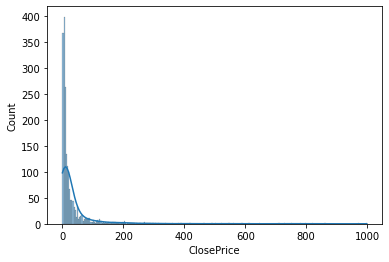

In [53]:
sns.histplot(data=data, x="ClosePrice", kde=True)

#### Transformation

In [50]:
closeprice_log=np.log(data['ClosePrice'])

#### Fixed Data

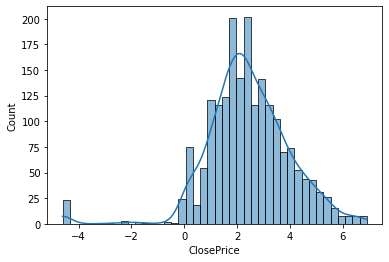

In [54]:
sns.histplot(data=closeprice_log, kde=True)

#### Skewed data Open Price

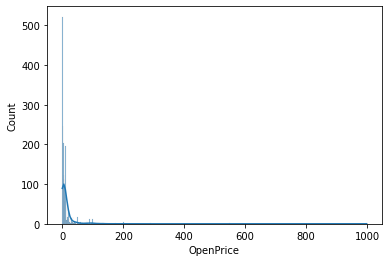

In [55]:
sns.histplot(data=data, x="OpenPrice", kde=True)

#### Transformation

In [56]:
openprice_log=np.log(data['OpenPrice'])

#### Fixed Data

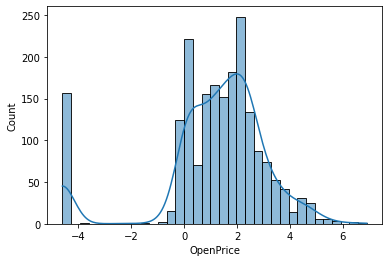

In [57]:
sns.histplot(data=openprice_log, kde=True)

#### Skewed data Seller Rating

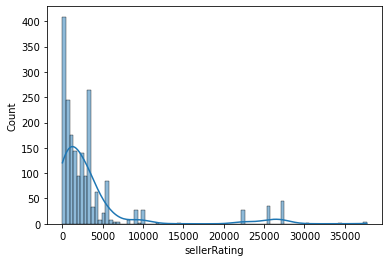

In [58]:
sns.histplot(data=data, x="sellerRating", kde=True)

#### Transformation

In [60]:
sellerRating_log=np.log(data['sellerRating'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### Fixed Data

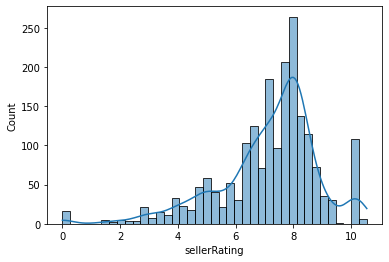

In [61]:
sns.histplot(data=sellerRating_log, kde=True)

#### Histplots for othe columns

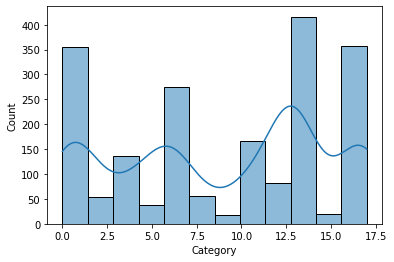

In [43]:
(sns.histplot(data=data, x="Category", kde=True)

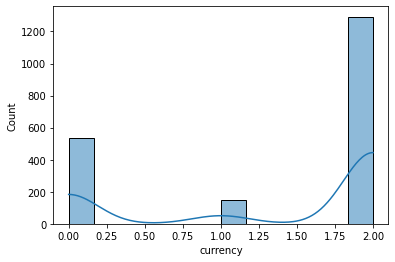

In [44]:
sns.histplot(data=data, x="currency", kde=True)

## Dividing the data into test and training set

In [28]:
y = data["Competitive?"] #Target variable

X = data.drop(columns="Competitive?") #Dependent variables

## Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Standard scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Decision Tress Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtree = DecisionTreeClassifier()

In [33]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction

In [34]:
predictions = dtree.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

## Confusion Matrix

In [36]:
print(confusion_matrix(y_test,predictions))

[[163  23]
 [ 23 186]]


## Classification Report

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       186
           1       0.89      0.89      0.89       209

    accuracy                           0.88       395
   macro avg       0.88      0.88      0.88       395
weighted avg       0.88      0.88      0.88       395



## Decision Tree

In [37]:
feature_cols=["Category","currency","sellerRating","Duration","endDay","ClosePrice","OpenPrice"]

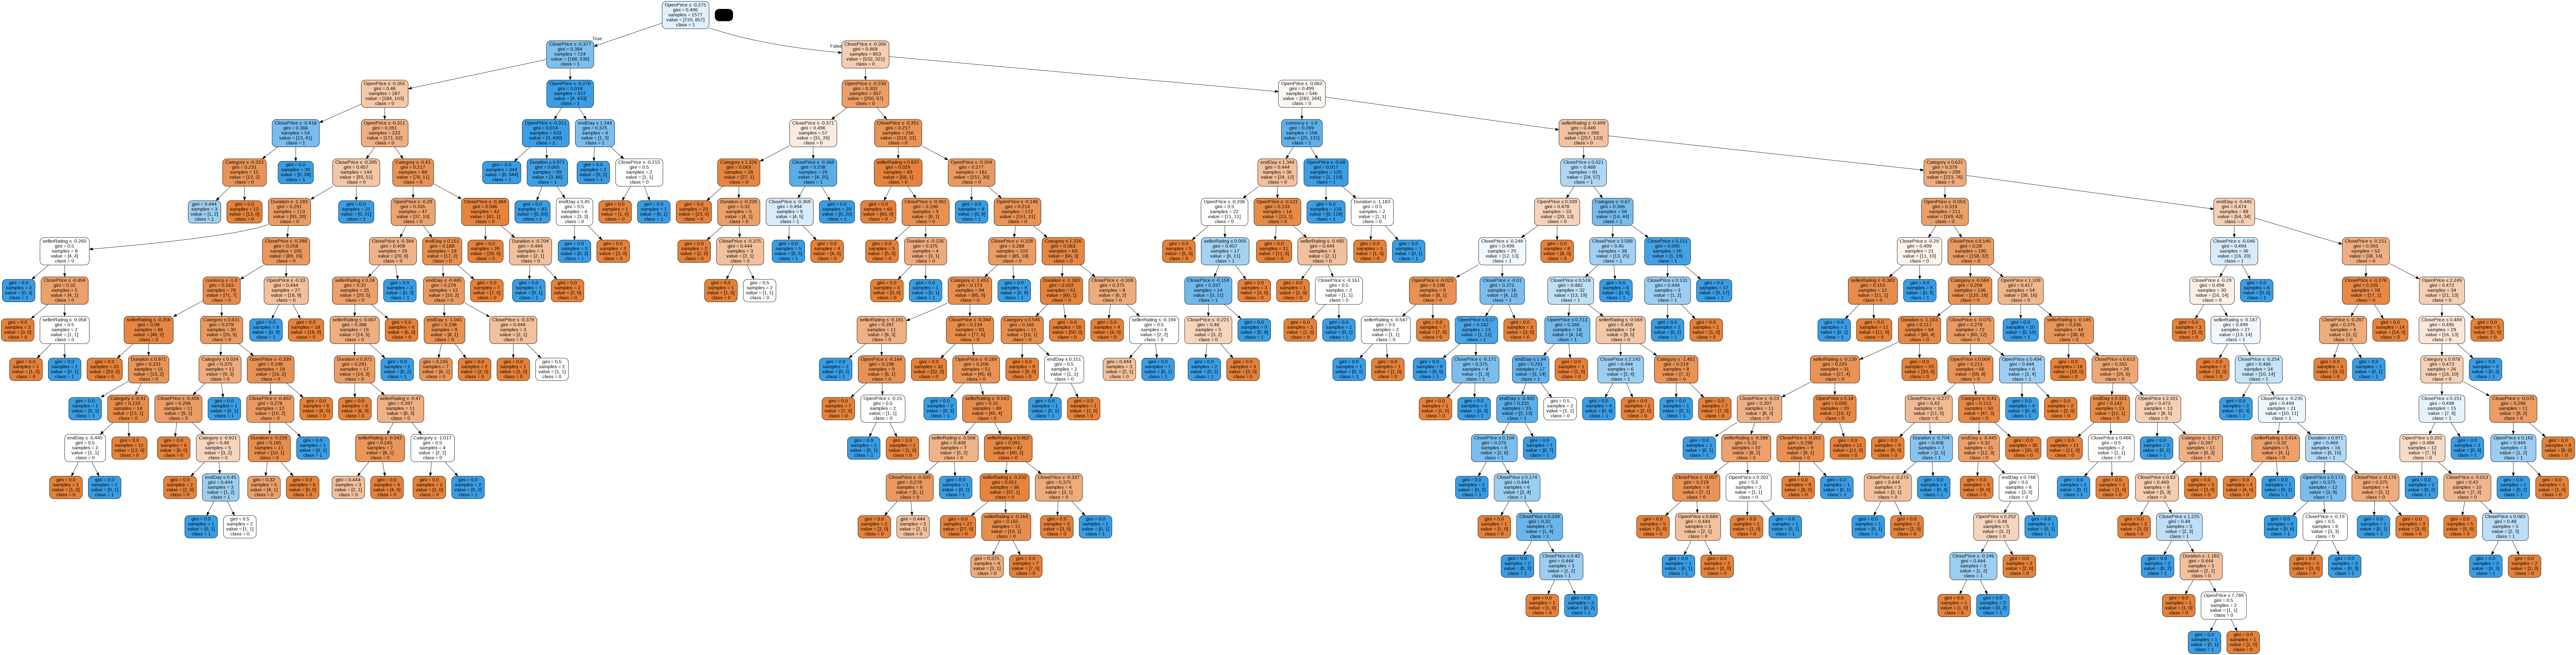

In [38]:
from sklearn.tree import export_graphviz
from six import StringIO

#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('sales.png')
Image(graph.create_png())


In [ ]:
pip install pydotplus

In [ ]:
pip install graphviz

## Optimising Decision Tree performance by pre-pruning and selecting entropy



In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [40]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,predictions))

Accuracy: 0.8835443037974684


#### Accuracy of 0.88 is obtained

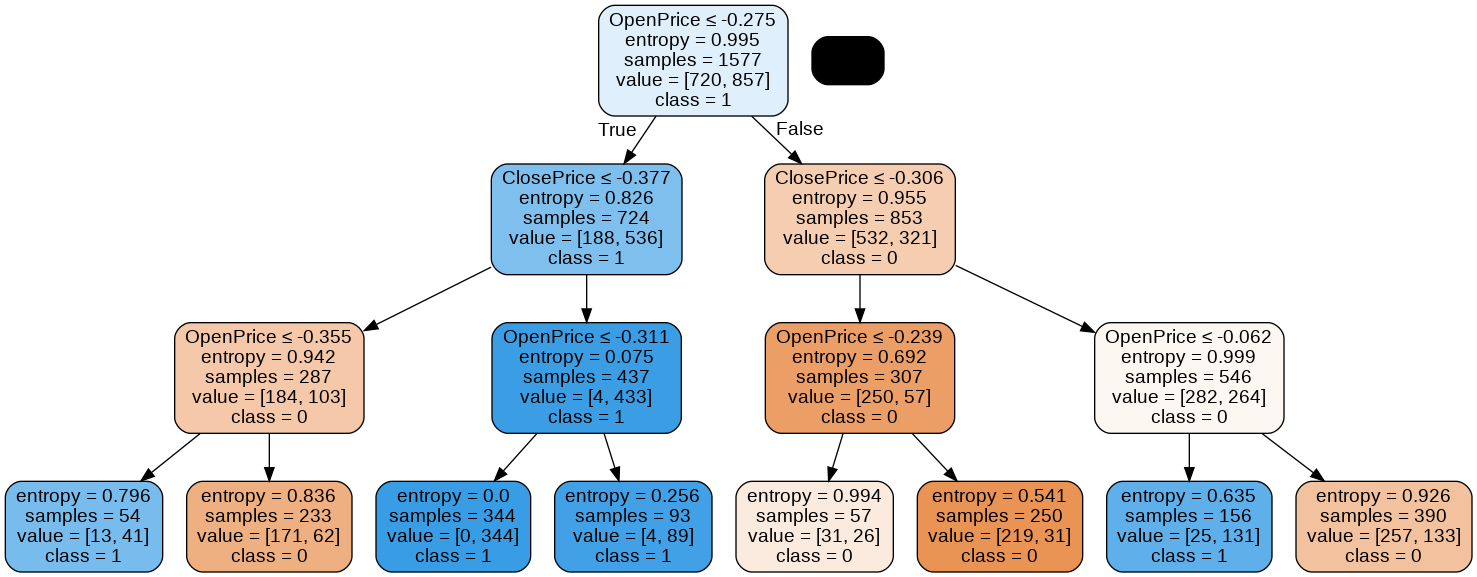

In [41]:
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())